In [ ]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load vectorizer + logistic regression

pipe = joblib.load(r"C:\Users\ksb20168\OneDrive - University of Strathclyde\Fifth Year\MS983\Models\ISOT_LR_model.joblib")
tfidf = pipe.named_steps["tfidf"]
lr_model = pipe.named_steps["clf"]

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.6.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.6.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.1 when using version 1.4.2. This might lead to b

In [ ]:
# Get feature names (tokens)
feature_names = np.array(tfidf.get_feature_names_out())

# Get coefficients (1D array, one weight per token)
coefs = lr_model.coef_[0]

# Top tokens pushing toward "Real" (positive class, label=1)
top_real_idx = np.argsort(coefs)[-20:][::-1]
top_real_tokens = feature_names[top_real_idx]
top_real_weights = coefs[top_real_idx]

# Top tokens pushing toward "Fake" (negative class, label=0)
top_fake_idx = np.argsort(coefs)[:20]
top_fake_tokens = feature_names[top_fake_idx]
top_fake_weights = coefs[top_fake_idx]


Matplotlib is building the font cache; this may take a moment.


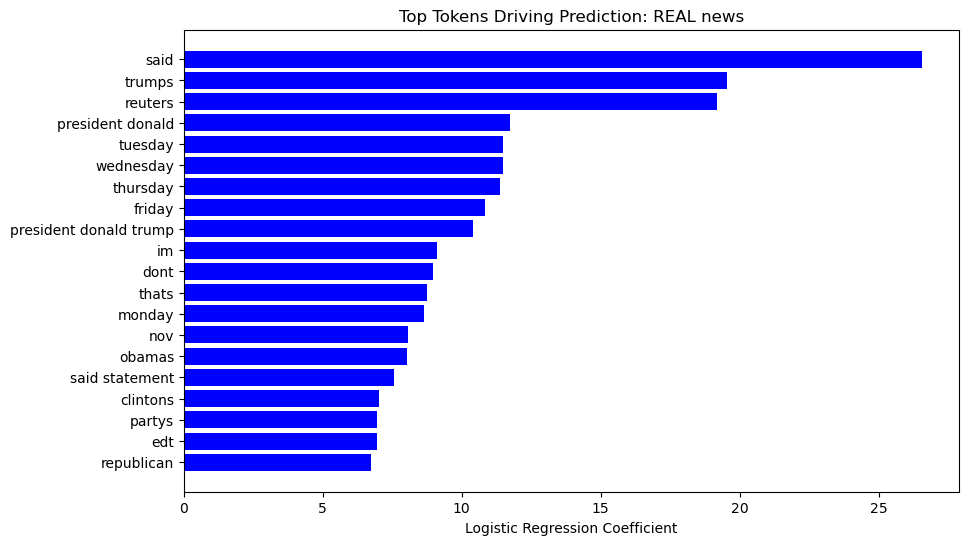

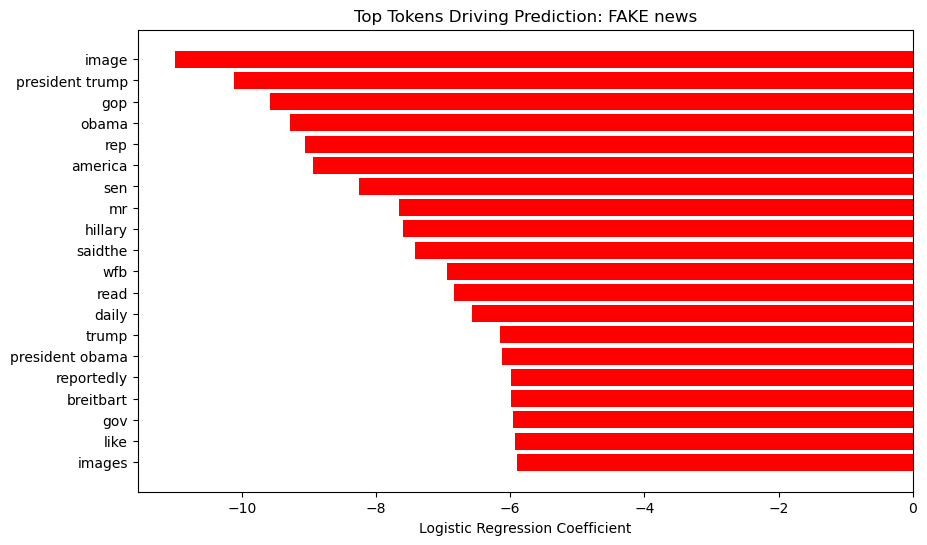

In [ ]:
# Bar chart for real
plt.figure(figsize=(10,6))
plt.barh(top_real_tokens[::-1], top_real_weights[::-1], color="blue")
plt.title("Top Tokens Driving Prediction: REAL news")
plt.xlabel("Logistic Regression Coefficient")
plt.show()

# Bar chart for fake
plt.figure(figsize=(10,6))
plt.barh(top_fake_tokens[::-1], top_fake_weights[::-1], color="red")
plt.title("Top Tokens Driving Prediction: FAKE news")
plt.xlabel("Logistic Regression Coefficient")
plt.show()
